In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2

class Videoto3D:

    def __init__(self, width, height, depth):
        self.width = width
        self.height = height
        self.depth = depth

    def video3d(self, filename, color=False, skip=True):
        
        cap = cv2.VideoCapture(filename)

        nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)

        if skip:
            frames = [x * nframe / self.depth for x in range(self.depth)]
        else:
            frames = [x for x in range(self.depth)]
        
        framearray = []

        for i in range(self.depth):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
            ret, frame = cap.read()
            try:
              frame = cv2.resize(frame, (self.height, self.width))
            except:
              print("break here")
              break
        
            if color:
                framearray.append(frame)
            else:
                framearray.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

        cap.release()
        
        return np.array(framearray)

In [ ]:
import argparse
import os

import matplotlib
matplotlib.use('AGG')

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPool3D, Input, ZeroPadding3D)
import keras
from keras.layers import ELU, PReLU, LeakyReLU, Input
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from keras.callbacks import ModelCheckpoint

##
import tensorflow as tf
from keras.backend import set_session


def loaddata(video_dir, vid3d, nclass, color=False, skip=True):
    
    files = os.listdir(video_dir)  
    X = []
    labels = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

    pbar = tqdm(total=len(files))

    for filename in files:
    
        pbar.update(1)
        
        name = os.path.join(video_dir, filename)

        print(filename) #to cross check data with labels
            
        X.append(vid3d.video3d(name, color=color, skip=skip))

    pbar.close()

    if color:
        #return np.array(X).transpose((0, 2, 3, 4, 1)), labels
        return np.array(X), labels
    else:
        #return np.array(X).transpose((0, 2, 3, 1)), labels
        return np.array(X), labels

In [ ]:
depth = 16
img_rows, img_cols, frames = 112, 112, depth
channel = 3 
batch = 16
epoch = 200
videos = '/content/drive/MyDrive/BDD/20/'
color = True
skip = False
nclass = 2

vid3d = Videoto3D(img_rows, img_cols, frames)
nb_classes = 2

x, y = loaddata(videos, vid3d, nclass, color, skip)

X = x.reshape((x.shape[0], img_rows, img_cols, frames, channel))
Y = np_utils.to_categorical(y,num_classes=nb_classes)

X = X.astype('float32')
    
print('\nX_shape:{}\nY_shape:{}'.format(X.shape, Y.shape))

  0%|          | 0/20 [00:00<?, ?it/s]

part24864-25063.avi


 10%|█         | 2/20 [00:01<00:14,  1.25it/s]

part20426-20625.avi


 15%|█▌        | 3/20 [00:02<00:15,  1.13it/s]

part7001-7200.avi


 20%|██        | 4/20 [00:03<00:14,  1.07it/s]

part37524-37723.avi


 25%|██▌       | 5/20 [00:04<00:14,  1.00it/s]

part24664-24863.avi


 30%|███       | 6/20 [00:05<00:14,  1.02s/it]

part8066-8265.avi


 35%|███▌      | 7/20 [00:07<00:16,  1.27s/it]

part1748-1947.avi


 40%|████      | 8/20 [00:09<00:16,  1.36s/it]

part6781-6980.avi


 45%|████▌     | 9/20 [00:10<00:16,  1.46s/it]

part7112-7311.avi


 50%|█████     | 10/20 [00:13<00:17,  1.78s/it]

part7670-7869.avi


 55%|█████▌    | 11/20 [00:14<00:15,  1.68s/it]

part2227-2426.avi


 60%|██████    | 12/20 [00:15<00:11,  1.48s/it]

part3982-4181.avi


 65%|██████▌   | 13/20 [00:16<00:09,  1.30s/it]

part3977-4176.avi


 70%|███████   | 14/20 [00:17<00:07,  1.17s/it]

part5561-5760.avi


 75%|███████▌  | 15/20 [00:18<00:05,  1.18s/it]

part2311-2510.avi


 80%|████████  | 16/20 [00:19<00:04,  1.11s/it]

part6492-6691.avi


 85%|████████▌ | 17/20 [00:21<00:04,  1.36s/it]

part1911-2110.avi


 90%|█████████ | 18/20 [00:22<00:02,  1.22s/it]

part2111-2310.avi


 95%|█████████▌| 19/20 [00:23<00:01,  1.11s/it]

part1790-1989.avi


100%|██████████| 20/20 [00:24<00:00,  1.05s/it]

part931-1130.avi


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


X_shape:(20, 112, 112, 16, 3)
Y_shape:(20, 2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv3D)              (None, 112, 112, 16, 64)  5248      
                                                                 
 pool1 (MaxPooling3D)        (None, 112, 56, 8, 64)    0         
                                                                 
 conv2 (Conv3D)              (None, 112, 56, 8, 128)   221312    
                                                                 
 pool2 (MaxPooling3D)        (None, 56, 28, 4, 128)    0         
                                                                 
 conv3a (Conv3D)             (None, 56, 28, 4, 256)    884992    
                                                                 
 conv3b (Conv3D)             (None, 56, 28, 4, 256)    1769728   
                                                                 
 pool3 (MaxPooling3D)        (None, 28, 14, 2, 256)    0

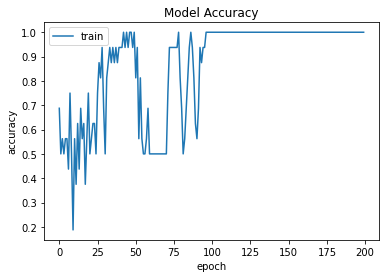

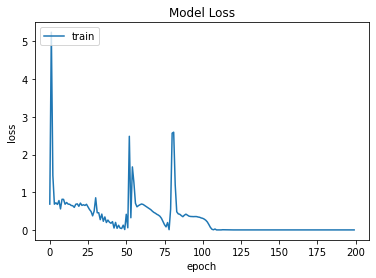

In [ ]:

# Define C3D model
model = Sequential()
   
model.add(Conv3D(64,kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv1',input_shape=(X.shape[1:])))
model.add(MaxPool3D(pool_size=(1, 2, 2), strides=(1, 2, 2),padding='same', name='pool1'))
# 2nd layer group
model.add(Conv3D(128, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv2'))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='same', name='pool2'))
# 3rd layer group
model.add(Conv3D(256,kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv3a'))
model.add(Conv3D(256, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv3b'))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='same', name='pool3'))
# 4th layer group
model.add(Conv3D(512, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv4a'))
model.add(Conv3D(512, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv4b'))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='same', name='pool4'))
# 5th layer group
model.add(Conv3D(512, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv5a'))
model.add(Conv3D(512, kernel_size= (3, 3, 3), activation='relu',padding='same', name='conv5b'))
model.add(ZeroPadding3D(padding=((0, 0), (0, 1), (0, 1)), name='zeropad5'))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='same', name='pool5'))
model.add(Flatten())
# FC layers group
model.add(Dense(4096, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(4096, activation='relu', name='fc7'))
model.add(Dropout(.5))
model.add(Dense(nb_classes, activation='softmax', name='fc8'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer,loss=categorical_crossentropy,metrics=['accuracy'])
model.summary()

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=43)


# Train model
history = model.fit(X_train, Y_train, batch_size=batch,
                    epochs=epoch, verbose=1, shuffle=True)
    
model.evaluate(X_test, Y_test, verbose=0)

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    
print('Test loss:', loss)
print('Test accuracy:', acc)

# summarize history for accuracy
%matplotlib inline
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()